In [202]:
import pandas as pd
import os
import ast

import sklearn as skl
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [203]:
features_df = pd.read_csv("features.csv", index_col=0,header=[0, 1, 2], skip_blank_lines=True)
features_df.head()


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [204]:
mfcc = features_df['mfcc']
mfcc.head()

statistics   kurtosis                                                    \
number             01        02        03        04        05        06   
track_id                                                                  
2            3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
3            4.296755  1.399977  0.112535 -0.211170  0.032953 -0.023489   
5            2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10           5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
20          11.880132  4.085320  0.002655  1.518562  0.181947  0.339014   

statistics                                          ...        std             \
number            07        08        09        10  ...         11         12   
track_id                                            ...                         
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609   8.601942   
3           0.150404  0.046454  0.033484 -0.064596  ...   8.771966  10.026867   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638   9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734   7.985110   
20          0.367611  0.069932 -0.016032  0.026012  ...   7.706648   6.498904   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
3           6.978541  7.650417  9.600357  7.222888  8.398293  7.285423   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
20          6.845514  6.934421  7.019398  6.983841  6.813648  7.520811   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
3           7.417791  8.777440  
5           8.452527  7.334442  
10          6.430473  6.186294  
20          7.098001  7.032246  

[5 rows x 140 columns]

In [205]:
tracks = pd.read_csv("tracks.csv",index_col=0,header=[0, 1])
tracks.head()
keep_cols = [('set', 'split'),
('set', 'subset'),('track', 'genre_top'), ('track', 'genres')]

tracks = tracks[keep_cols]
tracks.head()

set             track           
             split  subset genre_top     genres
track_id                                       
2         training   small   Hip-Hop       [21]
3         training  medium   Hip-Hop       [21]
5         training   small   Hip-Hop       [21]
10        training   small       Pop       [10]
20        training   large       NaN  [76, 103]

In [206]:
len(tracks[tracks['track','genre_top'].isnull()])

56976

In [207]:
req_tracks = tracks[~tracks['track','genre_top'].isna()]
print(len(req_tracks))
non_na = list(req_tracks.index.values)


49598


In [238]:
filtered_mfcc = mfcc[mfcc.index.isin(non_na)]
filtered_mfcc.head()

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
3           4.296755  1.399977  0.112535 -0.211170  0.032953 -0.023489   
5           2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10          5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
134         1.559808  0.840775 -0.171289 -0.265671 -0.279361  0.190866   

statistics                                          ...        std             \
number            07        08        09        10  ...         11         12   
track_id                                            ...                         
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609   8.601942   
3           0.150404  0.046454  0.033484 -0.064596  ...   8.771966  10.026867   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638   9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734   7.985110   
134        -0.192000  0.422766  0.044087 -0.003510  ...   9.891955   9.696905   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
3           6.978541  7.650417  9.600357  7.222888  8.398293  7.285423   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
134         8.477474  7.413949  7.518894  6.755280  6.344675  6.761541   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
3           7.417791  8.777440  
5           8.452527  7.334442  
10          6.430473  6.186294  
134         7.134986  6.803034  

[5 rows x 140 columns]

In [ ]:
train = req_tracks['set', 'split'] == 'training'
val = req_tracks['set', 'split'] == 'validation'
test = req_tracks['set', 'split'] == 'test'

y_train = req_tracks.loc[train, ('track', 'genre_top')]
y_val = req_tracks.loc[val, ('track', 'genre_top')]
y_test = req_tracks.loc[test, ('track', 'genre_top')]

X_train_mfcc = filtered_mfcc.loc[train]
X_val_mfcc = filtered_mfcc.loc[val]
X_test_mfcc = filtered_mfcc.loc[test]


# X_train = pd.concat([X_train_mfcc, X_train_tonnetz], axis=1)
# X_val = pd.concat([X_val_mfcc, X_val_tonnetz], axis=1)

X_train = X_train_mfcc
X_val = X_val_mfcc

print(X_train_mfcc.shape)

print('{} training examples, {} val examples, {} test examples'.format(y_train.size, y_val.size,y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))



In [ ]:
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
#Shuffle training features
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.MinMaxScaler(copy=False)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test_mfcc)

In [ ]:
## Label encode y - data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)
le.classes_

In [ ]:
genresDict = {'Blues':0, 'Classical':1, 'Country':2, 'Easy Listening':3, 'Electronic':4,
       'Experimental':5, 'Folk':6, 'Hip-Hop':7, 'Instrumental':8, 'International':9,
       'Jazz':10, 'Old-Time / Historic':11, 'Pop':12, 'Rock':13, 'Soul-RnB':14, 'Spoken':15}

In [ ]:
print(y_train)

In [95]:
random_state=10;
multi_class='multinomial';
solver='lbfgs';
max_iter=1000;


In [107]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=random_state,multi_class=multi_class,solver=solver,max_iter=max_iter).fit(X_train, y_train)

In [99]:
y_pred = lr.predict(X_test)
y_pred

array([13, 13,  5, ..., 13, 13,  4])

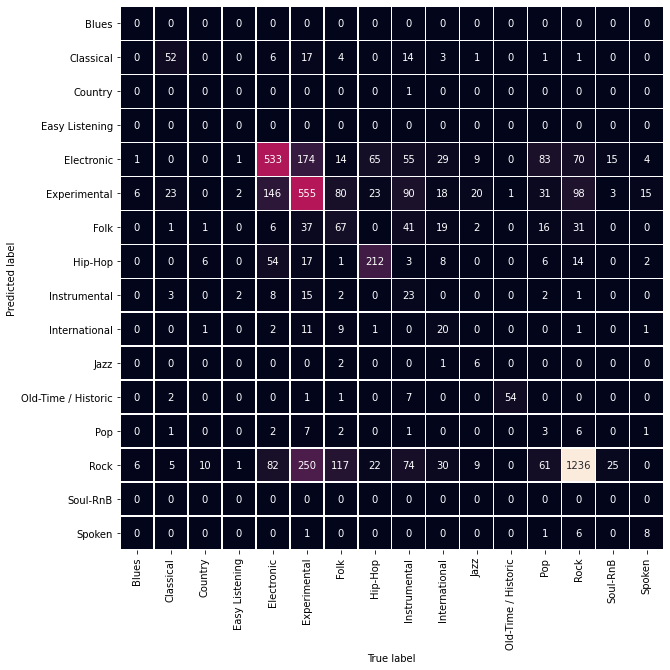

In [83]:
mat = confusion_matrix(y_test, y_pred)
figMat = pyplot.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=genresDict.keys(),
            yticklabels=genresDict.keys(), linewidths=.5)
pyplot.xlabel('True label')
pyplot.ylabel('Predicted label');

In [111]:
lr_train = lr.score(X_train,y_train)
print(lr_train);
#clf.score(X_val, y_val)

0.5911674135643291


In [112]:
lr_test = lr.score(X_test,y_test)
print(lr_test);

0.5592809533427591


In [243]:
from keras import backend as K
from keras import activations, initializers
from keras.layers import Layer

import tensorflow as tf
import tensorflow_probability as tfp


class DenseVariational(Layer):
    def __init__(self,
                 units,
                 kl_weight,
                 activation=None,
                 prior_sigma_1=0.75,
                 prior_sigma_2=0.002,
                 prior_pi=0.5, **kwargs):
        self.units = units
        self.kl_weight = kl_weight
        self.activation = activations.get(activation)
        self.prior_sigma_1 = prior_sigma_1
        self.prior_sigma_2 = prior_sigma_2
        self.prior_pi_1 = prior_pi
        self.prior_pi_2 = 1.0 - prior_pi
        self.init_sigma = np.sqrt(self.prior_pi_1 * self.prior_sigma_1 ** 2 +
                                  self.prior_pi_2 * self.prior_sigma_2 ** 2)

        super().__init__(**kwargs)

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

    def build(self, input_shape):
        self.kernel_mu = self.add_weight(name='kernel_mu',
                                         shape=(input_shape[1], self.units),
                                         initializer=initializers.normal(stddev=self.init_sigma),
                                         trainable=True)
        self.bias_mu = self.add_weight(name='bias_mu',
                                       shape=(self.units,),
                                       initializer=initializers.normal(stddev=self.init_sigma),
                                       trainable=True)
        self.kernel_rho = self.add_weight(name='kernel_rho',
                                          shape=(input_shape[1], self.units),
                                          initializer=initializers.constant(0.0),
                                          trainable=True)
        self.bias_rho = self.add_weight(name='bias_rho',
                                        shape=(self.units,),
                                        initializer=initializers.constant(0.0),
                                        trainable=True)
        super().build(input_shape)

    def call(self, inputs, **kwargs):
        kernel_sigma = tf.math.softplus(self.kernel_rho)
        kernel = self.kernel_mu + kernel_sigma * tf.random.normal(self.kernel_mu.shape)

        bias_sigma = tf.math.softplus(self.bias_rho)
        bias = self.bias_mu + bias_sigma * tf.random.normal(self.bias_mu.shape)

        self.add_loss(self.kl_loss(kernel, self.kernel_mu, kernel_sigma) +
                      self.kl_loss(bias, self.bias_mu, bias_sigma))

        return self.activation(K.dot(inputs, kernel) + bias)

    def kl_loss(self, w, mu, sigma):
        variational_dist = tfp.distributions.Normal(mu, sigma)
        return self.kl_weight * K.sum(variational_dist.log_prob(w) - self.log_prior_prob(w))

    def log_prior_prob(self, w):
        comp_1_dist = tfp.distributions.Normal(0.0, self.prior_sigma_1)
        comp_2_dist = tfp.distributions.Normal(0.0, self.prior_sigma_2)
        return K.log(self.prior_pi_1 * comp_1_dist.prob(w) +
                     self.prior_pi_2 * comp_2_dist.prob(w))

In [218]:
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Input
from keras.models import Model

batch_size = 200
num_samples = 39943
num_batches = num_samples/batch_size

kl_weight = 1.0 / num_batches
prior_params = {
    'prior_sigma_1': 0.75, 
    'prior_sigma_2': 0.002, 
    'prior_pi': 1
}


x_in = Input(shape=(140,))
x = DenseVariational(20, kl_weight, **prior_params, activation='relu')(x_in)
x = DenseVariational(20, kl_weight, **prior_params, activation='relu')(x)
x = DenseVariational(16, kl_weight, **prior_params, activation='softmax')(x)
model = Model(x_in, x)



In [ ]:
#standard CNN

model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(140,activation = 'relu',input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
# model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(16,activation = 'softmax'))

In [219]:
from keras import callbacks, optimizers

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mse','accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, verbose=1,validation_data=(X_test, y_test));

Epoch 1/200
200/200 [==============================] - 0s 2ms/step - loss: 1.9440 - mse: 77.2933 - accuracy: 0.3705 - val_loss: 1.7710 - val_mse: 80.0033 - val_accuracy: 0.4581
Epoch 2/200
200/200 [==============================] - 0s 1ms/step - loss: 1.6918 - mse: 77.2978 - accuracy: 0.4498 - val_loss: 1.5955 - val_mse: 80.0068 - val_accuracy: 0.4775
Epoch 3/200
200/200 [==============================] - 0s 1ms/step - loss: 1.5673 - mse: 77.3002 - accuracy: 0.4879 - val_loss: 1.5443 - val_mse: 80.0075 - val_accuracy: 0.5011
Epoch 4/200
200/200 [==============================] - 0s 1ms/step - loss: 1.5045 - mse: 77.3017 - accuracy: 0.5152 - val_loss: 1.5087 - val_mse: 80.0081 - val_accuracy: 0.5197
Epoch 5/200
200/200 [==============================] - 0s 1ms/step - loss: 1.4674 - mse: 77.3029 - accuracy: 0.5294 - val_loss: 1.4972 - val_mse: 80.0092 - val_accuracy: 0.5201
Epoch 6/200
200/200 [==============================] - 0s 1ms/step - loss: 1.4390 - mse: 77.3036 - accuracy: 0.5370

200/200 [==============================] - 0s 1ms/step - loss: 1.2075 - mse: 77.3096 - accuracy: 0.6074 - val_loss: 1.3458 - val_mse: 80.0153 - val_accuracy: 0.5653
Epoch 48/200
200/200 [==============================] - 0s 1ms/step - loss: 1.2085 - mse: 77.3098 - accuracy: 0.6081 - val_loss: 1.3052 - val_mse: 80.0146 - val_accuracy: 0.5807
Epoch 49/200
200/200 [==============================] - 0s 1ms/step - loss: 1.2070 - mse: 77.3096 - accuracy: 0.6084 - val_loss: 1.3260 - val_mse: 80.0172 - val_accuracy: 0.5746
Epoch 50/200
200/200 [==============================] - 0s 1ms/step - loss: 1.2021 - mse: 77.3099 - accuracy: 0.6093 - val_loss: 1.3672 - val_mse: 80.0169 - val_accuracy: 0.5583
Epoch 51/200
200/200 [==============================] - 0s 1ms/step - loss: 1.2027 - mse: 77.3098 - accuracy: 0.6084 - val_loss: 1.3180 - val_mse: 80.0156 - val_accuracy: 0.5775
Epoch 52/200
200/200 [==============================] - 0s 1ms/step - loss: 1.1987 - mse: 77.3100 - accuracy: 0.6087 - val_

200/200 [==============================] - 0s 1ms/step - loss: 1.1427 - mse: 77.3113 - accuracy: 0.6260 - val_loss: 1.2918 - val_mse: 80.0178 - val_accuracy: 0.5890
Epoch 94/200
200/200 [==============================] - 0s 1ms/step - loss: 1.1402 - mse: 77.3114 - accuracy: 0.6261 - val_loss: 1.2891 - val_mse: 80.0169 - val_accuracy: 0.5930
Epoch 95/200
200/200 [==============================] - 0s 1ms/step - loss: 1.1347 - mse: 77.3115 - accuracy: 0.6298 - val_loss: 1.3152 - val_mse: 80.0164 - val_accuracy: 0.5773
Epoch 96/200
200/200 [==============================] - 0s 1ms/step - loss: 1.1348 - mse: 77.3114 - accuracy: 0.6292 - val_loss: 1.2961 - val_mse: 80.0174 - val_accuracy: 0.5849
Epoch 97/200
200/200 [==============================] - 0s 1ms/step - loss: 1.1325 - mse: 77.3115 - accuracy: 0.6289 - val_loss: 1.2899 - val_mse: 80.0190 - val_accuracy: 0.5886
Epoch 98/200
200/200 [==============================] - 0s 1ms/step - loss: 1.1344 - mse: 77.3116 - accuracy: 0.6300 - val_

Epoch 139/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0932 - mse: 77.3124 - accuracy: 0.6407 - val_loss: 1.2839 - val_mse: 80.0192 - val_accuracy: 0.5934
Epoch 140/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0933 - mse: 77.3125 - accuracy: 0.6408 - val_loss: 1.3101 - val_mse: 80.0188 - val_accuracy: 0.5750
Epoch 141/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0910 - mse: 77.3125 - accuracy: 0.6411 - val_loss: 1.2996 - val_mse: 80.0202 - val_accuracy: 0.5936
Epoch 142/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0913 - mse: 77.3125 - accuracy: 0.6419 - val_loss: 1.3144 - val_mse: 80.0197 - val_accuracy: 0.5857
Epoch 143/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0901 - mse: 77.3126 - accuracy: 0.6404 - val_loss: 1.3003 - val_mse: 80.0185 - val_accuracy: 0.5914
Epoch 144/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0898 - mse: 77.3125 - accu

Epoch 185/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0577 - mse: 77.3132 - accuracy: 0.6513 - val_loss: 1.3191 - val_mse: 80.0184 - val_accuracy: 0.5884
Epoch 186/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0617 - mse: 77.3133 - accuracy: 0.6485 - val_loss: 1.3315 - val_mse: 80.0200 - val_accuracy: 0.5926
Epoch 187/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0617 - mse: 77.3133 - accuracy: 0.6484 - val_loss: 1.3358 - val_mse: 80.0201 - val_accuracy: 0.5861
Epoch 188/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0590 - mse: 77.3133 - accuracy: 0.6498 - val_loss: 1.3167 - val_mse: 80.0187 - val_accuracy: 0.5906
Epoch 189/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0565 - mse: 77.3134 - accuracy: 0.6521 - val_loss: 1.3044 - val_mse: 80.0198 - val_accuracy: 0.5922
Epoch 190/200
200/200 [==============================] - 0s 1ms/step - loss: 1.0552 - mse: 77.3133 - accu

In [226]:
cnn_test = model.evaluate(X_test, y_test)[2]

155/155 [==============================] - 0s 510us/step - loss: 1.3232 - mse: 80.0193 - accuracy: 0.5896


In [225]:
cnn_train = model.evaluate(X_train, y_train)[2]

1249/1249 [==============================] - 1s 489us/step - loss: 1.0290 - mse: 77.3131 - accuracy: 0.6594


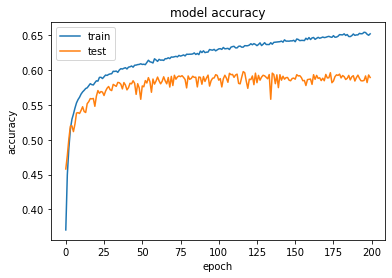

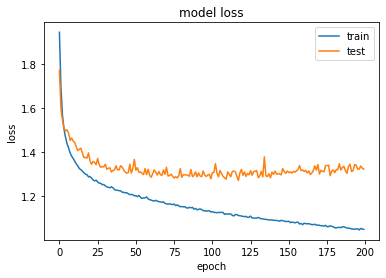

In [221]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

    # Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [245]:
from keras import callbacks, optimizers

noise = 1
def neg_log_likelihood(y_obs, y_pred, sigma=noise):
    dist = tfp.distributions.Normal(loc=y_pred, scale=sigma)
    return K.sum(-dist.log_prob(y_obs))

model.compile(loss=neg_log_likelihood, optimizer='adam', metrics=['mse','accuracy'])
model.fit(X_train, y_train, batch_size=batch_size, epochs=200, verbose=1);

Epoch 1/200
200/200 [==============================] - 0s 1ms/step - loss: 126479.7500 - mse: 77.2865 - accuracy: 0.1112
Epoch 2/200
200/200 [==============================] - 0s 1ms/step - loss: 126459.0234 - mse: 77.2850 - accuracy: 0.0377
Epoch 3/200
200/200 [==============================] - 0s 1ms/step - loss: 126472.2656 - mse: 77.2850 - accuracy: 0.0307
Epoch 4/200
200/200 [==============================] - 0s 1ms/step - loss: 126491.2734 - mse: 77.2850 - accuracy: 0.0811
Epoch 5/200
200/200 [==============================] - 0s 1ms/step - loss: 126460.6797 - mse: 77.2850 - accuracy: 0.1048
Epoch 6/200
200/200 [==============================] - 0s 1ms/step - loss: 126463.5156 - mse: 77.2849 - accuracy: 0.0961
Epoch 7/200
200/200 [==============================] - 0s 1ms/step - loss: 126460.6641 - mse: 77.2850 - accuracy: 0.1033
Epoch 8/200
200/200 [==============================] - 0s 1ms/step - loss: 126460.4219 - mse: 77.2850 - accuracy: 0.1048
Epoch 9/200
200/200 [===========

200/200 [==============================] - 0s 1ms/step - loss: 126458.9609 - mse: 77.2849 - accuracy: 0.0433
Epoch 69/200
200/200 [==============================] - 0s 1ms/step - loss: 126464.2656 - mse: 77.2849 - accuracy: 0.0429
Epoch 70/200
200/200 [==============================] - 0s 1ms/step - loss: 126473.4219 - mse: 77.2850 - accuracy: 0.0324
Epoch 71/200
200/200 [==============================] - 0s 1ms/step - loss: 126459.3359 - mse: 77.2850 - accuracy: 0.0487
Epoch 72/200
200/200 [==============================] - 0s 1ms/step - loss: 126484.0703 - mse: 77.2849 - accuracy: 0.0506
Epoch 73/200
200/200 [==============================] - 0s 1ms/step - loss: 126454.4609 - mse: 77.2850 - accuracy: 0.0622
Epoch 74/200
200/200 [==============================] - 0s 1ms/step - loss: 126459.9141 - mse: 77.2850 - accuracy: 0.0361
Epoch 75/200
200/200 [==============================] - 0s 1ms/step - loss: 126463.3203 - mse: 77.2850 - accuracy: 0.0673
Epoch 76/200
200/200 [===============

KeyboardInterrupt: 

In [139]:
model.evaluate(X_test, y_test, batch_size=128)

39/39 [==============================] - 0s 667us/step - loss: 6.7944 - mse: 80.0430 - accuracy: 0.4815


[6.794356346130371, 80.04297637939453, 0.4815188944339752]

In [97]:
 from sklearn.ensemble import RandomForestClassifier

In [101]:
test_score=[]
depths=[]
n_estimators=100
max_depth=1
random_state=1
for max_depth in range(1,13):
    rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rfc.fit(X_train, y_train)
    test_score.append(rfc.score(X_test, y_test))
    depths.append(max_depth)
print(test_score);
print(depths);
print(max_depth);

[0.37770147444960617, 0.44132498485154514, 0.4607150070692789, 0.4809129468794183, 0.4873762876186629, 0.5003029690971521, 0.5097960008079175, 0.5219147646940012, 0.5314077964047668, 0.5404968693193294, 0.5415067663098364, 0.5481720864471824]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
12


In [58]:
test_score = np.array(test_score)

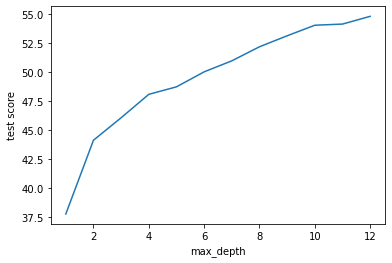

In [67]:
pyplot.plot(depths, test_score*100)
pyplot.xlabel('max_depth')
pyplot.ylabel('test score')
pyplot.show()

In [247]:
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

UsageError: Line magic function `%tensorboard` not found.


In [105]:
rfc_train = rfc.score(X_train,y_train)
print(rfc_train);

0.7781588763988684


In [106]:
rfc_test = rfc.score(X_test,y_test)
print(rfc_test);

0.5481720864471824


In [50]:
rfc.score(X_val,y_val)

0.5710034013605442

In [86]:
from sklearn.svm import SVC

decision_function_shape='ovo'

svc = SVC(decision_function_shape=decision_function_shape)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
svc_train = svc.score(X_train, y_train)
print(svc_train);

In [104]:
svc_test = svc.score(X_test, y_test)
print(svc_test);

0.5966471419915169


In [89]:
svc.score(X_val, y_val)

0.6105442176870748

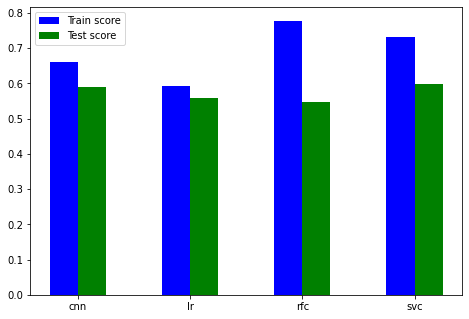

In [227]:
data = [[cnn_train, lr_train, rfc_train, svc_train],
[cnn_test, lr_test, rfc_test, svc_test]]
X = np.arange(4)
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])
width=0.25
ax.bar(X + 0.00, data[0], color = 'b', width = width, label='Train score')
ax.bar(X + 0.25, data[1], color = 'g', width = width, label='Test score')
pyplot.xticks(X + 0.125, ('cnn','lr', 'rfc', 'svc'))
ax.legend()

In [228]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from blitz.modules import BayesianLinear
from blitz.utils import variational_estimator
from blitz.modules import BayesianLinear, BayesianConv2d

In [229]:
X_train, y_train = torch.tensor(X_train).float(), torch.tensor(y_train, dtype=torch.float)
X_test, y_test = torch.tensor(X_test).float(), torch.tensor(y_test, dtype=torch.float)

In [230]:
print(y_train)

tensor([ 5.,  4., 13.,  ..., 13.,  5.,  7.])


In [231]:
@variational_estimator
class BayesianRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        #self.linear = nn.Linear(input_dim, output_dim)
        self.blinear1 = BayesianLinear(input_dim, 512)
        self.blinear2 = BayesianLinear(512, output_dim)
        
    def forward(self, x):
        x_ = self.blinear1(x)
        return self.blinear2(x_)

In [232]:
def evaluate_regression(regressor,
                        X,
                        y,
                        samples = 100,
                        std_multiplier = 2):
    preds = [regressor(X) for i in range(samples)]
    preds = torch.stack(preds)
    means = preds.mean(axis=0)
    stds = preds.std(axis=0)
    ci_upper = means + (std_multiplier * stds)
    ci_lower = means - (std_multiplier * stds)
    ic_acc = (ci_lower <= y) * (ci_upper >= y)
    ic_acc = ic_acc.float().mean()
    return ic_acc, (ci_upper >= y).float().mean(), (ci_lower <= y).float().mean()

In [235]:
regressor = BayesianRegressor(140, 1)
optimizer = optim.SGD(regressor.parameters(), lr=0.005)
criterion = torch.nn.MSELoss()

ds_train = torch.utils.data.TensorDataset(X_train, y_train)
dataloader_train = torch.utils.data.DataLoader(ds_train, batch_size=100, shuffle=True)

ds_test = torch.utils.data.TensorDataset(X_test, y_test)
dataloader_test = torch.utils.data.DataLoader(ds_test, batch_size=100, shuffle=True)

In [236]:
iteration = 0
for epoch in range(100):
    for i, (datapoints, labels) in enumerate(dataloader_train):
        optimizer.zero_grad()
        
        loss = regressor.sample_elbo(inputs=datapoints,
                           labels=labels,
                           criterion=criterion,
                           sample_nbr=3)
        loss.backward()
        optimizer.step()
        
        iteration += 1
        if iteration%100==0:
            ic_acc, under_ci_upper, over_ci_lower = evaluate_regression(regressor,
                                                                        X_test,
                                                                        y_test,
                                                                        samples=10,
                                                                        std_multiplier=3)
            
            print("CI acc: {:.2f}, CI upper acc: {:.2f}, CI lower acc: {:.2f}".format(ic_acc, under_ci_upper, over_ci_lower))
            print("Loss: {:.4f}".format(loss))

CI acc: 0.10, CI upper acc: 0.60, CI lower acc: 0.51
Loss: 10.6241
CI acc: 0.15, CI upper acc: 0.58, CI lower acc: 0.57
Loss: 10.7390
CI acc: 0.08, CI upper acc: 0.54, CI lower acc: 0.54
Loss: 11.5502
CI acc: 0.08, CI upper acc: 0.63, CI lower acc: 0.45
Loss: 11.2435
CI acc: 0.09, CI upper acc: 0.58, CI lower acc: 0.51
Loss: 11.7460
CI acc: 0.06, CI upper acc: 0.60, CI lower acc: 0.46
Loss: 10.6466
CI acc: 0.02, CI upper acc: 0.60, CI lower acc: 0.42
Loss: 11.3638
CI acc: 0.08, CI upper acc: 0.63, CI lower acc: 0.46
Loss: 11.2849
CI acc: 0.06, CI upper acc: 0.54, CI lower acc: 0.53
Loss: 11.8152
CI acc: 0.08, CI upper acc: 0.62, CI lower acc: 0.46
Loss: 11.0996
CI acc: 0.07, CI upper acc: 0.59, CI lower acc: 0.48
Loss: 11.3764
CI acc: 0.08, CI upper acc: 0.63, CI lower acc: 0.45
Loss: 9.8311
CI acc: 0.07, CI upper acc: 0.54, CI lower acc: 0.53
Loss: 10.1850
CI acc: 0.09, CI upper acc: 0.61, CI lower acc: 0.48
Loss: 11.5476
CI acc: 0.06, CI upper acc: 0.60, CI lower acc: 0.46
Loss: 10.6

KeyboardInterrupt: 

In [ ]:
@variational_estimator
class BayesianCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = BayesianConv2d(140, 16,(5,5))
        self.conv2 = BayesianConv2d(6, 16,(5,5))
        self.fc1   = BayesianLinear(140, 120)
        self.fc2   = BayesianLinear(120, 84)
        self.fc3   = BayesianLinear(84, 16)

    def forward(self, x):
        
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out



In [ ]:
device = torch.device('cpu')
classifier = BayesianCNN().to(device)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

iteration = 0
for epoch in range(100):
    for i, (datapoints, labels) in enumerate(dataloader_train):
        optimizer.zero_grad()
        loss = classifier.sample_elbo(inputs=datapoints.to(device),
                           labels=labels.to(device),
                           criterion=criterion,
                           sample_nbr=3)
        loss.backward()
        optimizer.step()
        
        iteration += 1
        if iteration%1000==0:
            correct = 0
            total = 0
            with torch.no_grad():
                for data in dataloader_test:
                    song, genre = data
                    outputs = classifier(song.to(device))
                    _, predicted = torch.max(outputs.data, 1)
                    total += genre.size(0)
                    correct += (predicted == genre.to(device)).sum().item()
            print('Iteration: {} | Accuracy of the network on the 10000 test images: {} %'.format(str(iteration) ,str(100 * correct / total)))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from blitz.modules import BayesianLinear, BayesianConv2d
from blitz.losses import kl_divergence_from_nn
from blitz.utils import variational_estimator

train_dataset = dsets.MNIST(root="./data",
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True
                            )
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

test_dataset = dsets.MNIST(root="./data",
                             train=False,
                             transform=transforms.ToTensor(),
                             download=True
                            )
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=64,
                                           shuffle=True)

@variational_estimator
class BayesianCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = BayesianConv2d(1, 6, (5,5))
        self.conv2 = BayesianConv2d(6, 16, (5,5))
        self.fc1   = BayesianLinear(256, 120)
        self.fc2   = BayesianLinear(120, 84)
        self.fc3   = BayesianLinear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = BayesianCNN().to(device)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

iteration = 0
for epoch in range(100):
    for i, (datapoints, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        loss = classifier.sample_elbo(inputs=datapoints.to(device),
                           labels=labels.to(device),
                           criterion=criterion,
                           sample_nbr=3)
        loss.backward()
        optimizer.step()
        
        iteration += 1
        if iteration%1000==0:
            correct = 0
            total = 0
            with torch.no_grad():
                for data in test_loader:
                    images, labels = data
                    outputs = classifier(images.to(device))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels.to(device)).sum().item()
            print('Iteration: {} | Accuracy of the network on the 10000 test images: {} %'.format(str(iteration) ,str(100 * correct / total)))

In [246]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms

#imports from our lib
from blitz.modules import BayesianLinear
from blitz.losses import kl_divergence_from_nn
from blitz.utils import variational_estimator
from blitz.utils.minibatch_weighting import minibatch_weight


X_train, y_train = torch.tensor(X_train,dtype=torch.float), torch.tensor(y_train, dtype=torch.float)
X_test, y_test = torch.tensor(X_test,dtype=torch.float), torch.tensor(y_test, dtype=torch.float)

#create dataloaders
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(ds_train, batch_size=100, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(ds_test, batch_size=100, shuffle=True)

#lets just create our bnn class
@variational_estimator
class BayesianNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.blinear1 = BayesianLinear(input_dim, 512)
        self.blinear2 = BayesianLinear(512,128)
        self.blinear3 = BayesianLinear(128, output_dim)
        
    def forward(self, x):
        x_ = x.view(-1, 140)
        x_ = self.blinear1(x_)
        x_ = self.blinear2(x_)
        return self.blinear3(x_)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = BayesianNetwork(140, 16).to(device)
optimizer = optim.SGD(classifier.parameters(), lr=0.08)
criterion = torch.nn.CrossEntropyLoss()


iteration = 0
for epoch in range(5):
    for i, (datapoints, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        pi_weight = minibatch_weight(batch_idx=i, num_batches=32)
        labels = labels.to(device=device, dtype=torch.int64)
        loss = classifier.sample_elbo(
            inputs=datapoints.to(device),
            labels=labels.to(device),
            criterion=criterion,
            sample_nbr=3,
            complexity_cost_weight=pi_weight
        )
       

        optimizer.step()
        
        iteration += 1
        if iteration%1000==0:
            correct = 0
            total = 0
            with torch.no_grad():
                for data in test_loader:
                    images, labels = data
                    outputs = classifier(images.to(device))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels.to(device)).sum().item()
                print('Iteration: {} | Accuracy of the network on the 10000 test images: {} %'.format(str(iteration) ,str(100 * correct / total)))

Iteration: 1000 | Accuracy of the network on the 10000 test images: 1.110886689557665 %
Iteration: 2000 | Accuracy of the network on the 10000 test images: 1.110886689557665 %
